In [133]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks

In [134]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [135]:
IMG_CHANNELS = 3
IMG_ROWS = 224
IMG_COLS = 224

CLASSES = 2  # 자전거, 전기 자전거

In [136]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',  # 컨볼루션 층
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 맥스 풀링층
    model.add(layers.Dropout(0.25)) # 드롭 아웃

    model.add(layers.Flatten()) # FNN 가기전의 드롭 아웃
    model.add(layers.Dense(32, activation='relu')) # Fully connected 층
    model.add(layers.Dense(classes, activation='softmax')) # 다중 분류(2 개의 클래스 )를 위한 출력 층
    return model

In [137]:
# from google.colab import drive
# drive.mount('/content/drive')

In [138]:
# 각 폴더에서 이미지 100개씩 불러오기
b_images = glob('../../data/ficture_data/b_e/b/*.jpg')[:142]
e_images = glob('../../data/ficture_data/b_e/e/*.jpg')[:142]

# 전체 이미지 경로 목록
all_images = b_images + e_images

# 이미지 불러오기 및 사이즈 조정
images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in all_images]

#  numpy 배열로 변환
image_vector = np.asarray([image.img_to_array(img) for img in images])


In [139]:
image_vector[0]

array([[[ 64.,  39.,  32.],
        [ 66.,  28.,  39.],
        [ 59.,  23.,  25.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [249., 254., 255.]],

       [[ 60.,  27.,  34.],
        [ 41.,  22.,  16.],
        [ 63.,  34.,  26.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [223., 220., 239.]],

       [[ 48.,  30.,  20.],
        [ 65.,  39.,  48.],
        [ 65.,  31.,  19.],
        ...,
        [255., 254., 255.],
        [210., 218., 231.],
        [151., 163., 175.]],

       ...,

       [[ 58.,  20.,  33.],
        [ 72.,  25.,  45.],
        [ 58.,  25.,  34.],
        ...,
        [252., 253., 245.],
        [255., 255., 255.],
        [253., 254., 248.]],

       [[ 53.,  24.,  44.],
        [ 49.,  14.,  38.],
        [ 54.,  25.,  21.],
        ...,
        [254., 255., 250.],
        [254., 255., 249.],
        [250., 251., 245.]],

       [[ 58.,  20.,  31.],
        [ 65.,  17.,  13.],
        [ 66.,  

In [140]:
image_vector.shape

(284, 224, 224, 3)

In [141]:
image_vector[0].shape

(224, 224, 3)

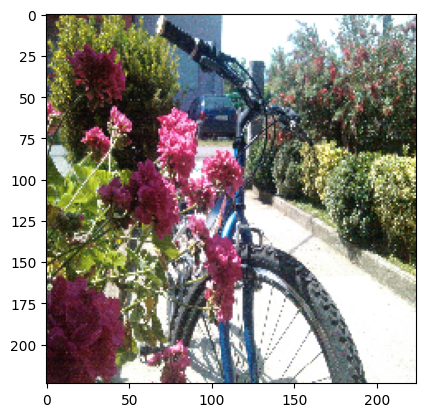

In [142]:
plt.imshow(image_vector[0]/255)

In [143]:
# y=[1] * 1000 + [0] * 1000
y=[1] * 142 + [0] * 142

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [145]:
X_train.shape

(227, 224, 224, 3)

In [146]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [147]:
y_train[80]

array([1., 0.], dtype=float32)

In [148]:
y_train[120]

array([0., 1.], dtype=float32)

In [149]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 flatten_5 (Flatten)         (None, 394272)            0         
                                                                 
 dense_10 (Dense)            (None, 32)                12616736  
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                      

In [150]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1, verbose=1, callbacks = [callback])

Epoch 1/50
7/7 [==============================] - 15s 2s/step - loss: 15.4240 - accuracy: 0.5392 - val_loss: 3.0421 - val_accuracy: 0.6087
Epoch 2/50
7/7 [==============================] - 2s 320ms/step - loss: 2.1529 - accuracy: 0.6029 - val_loss: 2.7667 - val_accuracy: 0.4348
Epoch 3/50
7/7 [==============================] - 3s 408ms/step - loss: 1.6011 - accuracy: 0.5686 - val_loss: 0.5969 - val_accuracy: 0.6957
Epoch 4/50
7/7 [==============================] - 3s 418ms/step - loss: 0.5485 - accuracy: 0.7157 - val_loss: 0.6333 - val_accuracy: 0.6957
Epoch 5/50
7/7 [==============================] - 3s 397ms/step - loss: 0.4153 - accuracy: 0.8627 - val_loss: 0.8258 - val_accuracy: 0.5652
Epoch 6/50
7/7 [==============================] - 3s 406ms/step - loss: 0.2381 - accuracy: 0.9216 - val_loss: 2.3171 - val_accuracy: 0.4348
Epoch 7/50
7/7 [==============================] - 3s 449ms/step - loss: 0.2491 - accuracy: 0.9167 - val_loss: 0.5773 - val_accuracy: 0.6522
Epoch 8/50
7/7 [=====

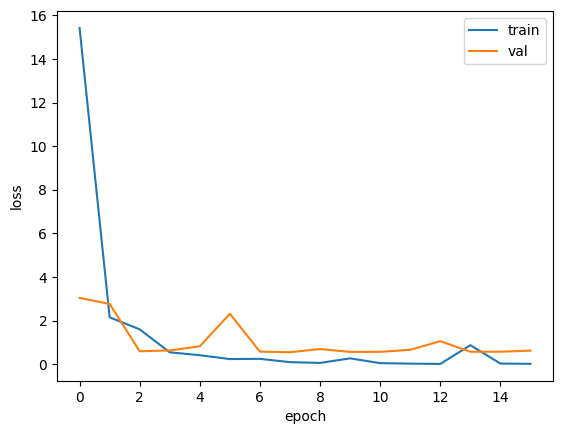

In [155]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

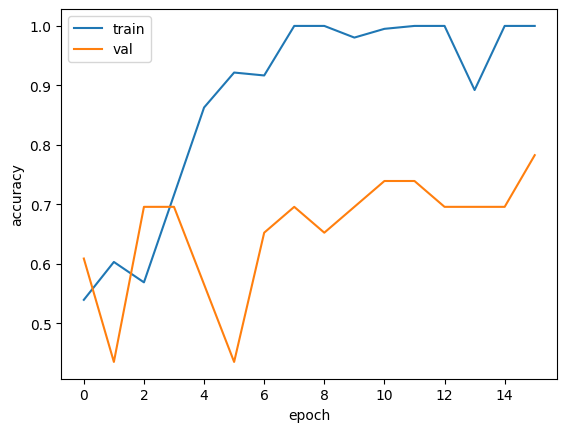

In [156]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [157]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 37ms/step - loss: 0.5997 - accuracy: 0.7018

Test loss: 0.5997138023376465
Test accuracy: 0.7017543911933899


model.save('b_e.h5')

학습된 모델을 사용하여 새로운 입력(이미지) 분류 - 자전거, 전기 자전거


from tensorflow.keras.models import load_model
모델 로드
model = load_model('/content/b_e.h5')

새 이미지 파일 경로
image_path = '/content/b2.JPG'

이미지 로딩 및 사이즈 조정
img = image.load_img(image_path, target_size=(224, 224))  # 모델에 맞는 이미지 크기로 조정
img_array = image.img_to_array(img)  # 이미지를 배열로 변환
img_array = np.expand_dims(img_array, axis=0)  # 배열의 형태를 (1, 224, 224, 3)으로 변환

예측
prediction = model.predict(img_array)
print("Prediction:", prediction)

예측 결과에 따라 자전거인지 전기 자전거인지 출력
if prediction[0][0] > 0.5:
    print("이 이미지는 전기 자전거입니다.")
else:
    print("이 이미지는 자전거입니다.")